## Do charges of people who smoke differ significantly from the people who don't?(HypothesisTesting)

### Import Library

In [1]:
# Pandas untuk import dan manipulasi data
import pandas as pd

# Numpy untuk perhitungan matematika
import numpy as np

# Seaborn untuk Visualisasi data
import seaborn as sns


# Scipy (sama seperti numpy namun lebih untuk statistik) untuk mengakomodasi perhitungan statistik
import scipy.stats as stats

### Import Customer Profil Data

In [2]:
# Import data CSV
data = pd.read_csv('insurance.csv')

In [3]:
# Melihat ringkasan data
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## The shape of the data

In [4]:
# Ingin melihat jumlah baris dan kolom
# Hasil akan menunjukan (1338, 7) artinya 1338 itu jumlah baris, 7 jumlah kolom
data.shape

(1338, 7)

Customer profile data Mallianzs insurance company has dimensions (1338,7) which
means that there are 1338 data rows and 7 data columns. 1338 rows represent the number of
customers while 7 columns namely age, sex, bmi, children, smoker, region and charges
represent the profile of each customer. Following is an explanation of each variable:

## The data type of each attribute

In [5]:
# Ingin melihat tipe data dari setiap kolom yang terdapat di data
print(data.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [6]:
# cara lain untuk memerika tipe data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


There are seven variables in the customer profile data, namely age, sex, bmi, children, smoker, region and charges. The age and children are variables with integer data types. The bmi and charges are variables with the float data type. While sex, smoker and region are variables with object data types.

## Checking the presence of missing values

In [7]:
# isnull() untuk memeriksa jumlah data yang kosong

# sum() untuk menampilkan berapa banyak jumlah data yang kosong

data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Based on the results above, it can be concluded that there is no missing value in the data.

## Summary of numerical attributes

In [8]:
# Jika ingin melihat deskriptif statistik secara keseluruhan

data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Do charges of people who smoke differ significantly from the people who don't? (Hypothesis Testing)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoker', ylabel='count'>

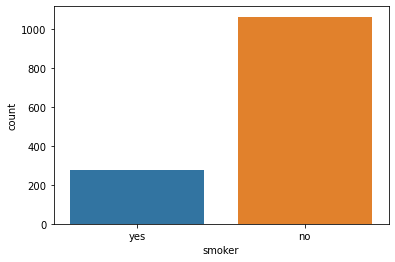

In [9]:
# Proportion of smoker and non smoker

# Melakukan visualisasi dengan seaborn

# Melihat jumlah perokok dengan yang bukan perokok

sns.countplot(data['smoker'])

The first step taken is to look at the comparison between customers who smoke and not smoke. Based on the picture below, it can be seen that there are 275 customers who smoke and 1064 customers who don't smoke.

<AxesSubplot:xlabel='smoker', ylabel='charges'>

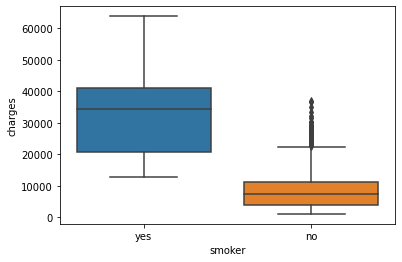

In [10]:
# Memeriksa pesebaran dari bayaran antara perokok dengan yang tidak perokok

# Dengan menggunakan boxplot

# x = data di kolom smoker

# y = data di kolom charges

# data = nama data yang ingin di tampilkan, dalam kasus ini namanya data. Jadi data = data

sns.boxplot(x = "smoker", y = "charges", data = data)

The next step is to look at the distribution of each class using the boxplot. If seen from the boxplots below, between customers who smoke and don't smoke, there really is a difference in charges. Customers who smoke on average have greater charges than customers who don't smoke.

In [11]:
# Selanjutnya, Data antara yang Perokok dengan yang bukan Perokok kita pisah

# Karena antara Perokok dengan yang bukan Perokok merupakan 2 sampel independen

# Data yang smokernya sama dengan yes atau perokok

smoke = data[(data['smoker'] == 'yes')]
smoke.reset_index(inplace = True) # reset index supaya kolomnya tidak menampilkan index tetapi menampilkan nama kolom

# Data yang smokernya sama dengan yes atau bukan perokok
no_smoke = data[(data['smoker'] == 'no')]
no_smoke.reset_index(inplace = True) # reset index supaya kolomnya tidak menampilkan index tetapi menampilkan nama kolom

In testing the mean difference in two populations, it can be used parametric and nonparametric tests. Parametric test is two independent sample t tests while non-parametric test is Mann Whitney. Parametric tests must meet the assumptions of normality and homogeneity of variance, if these two assumptions are not met then a non-parametric test can be used.

# Memeriksa apakah persyaratan/asumsi terpenuhi

# 1. Apakah data terdistribusi normal?

### Normality Test Using Jarque Bera Test

In [12]:
# Salah satu cara untuk memerikasa apakah data terdistribusi secara normal atau tidak dengan jarque bera
stats.jarque_bera(smoke['charges'])

Jarque_beraResult(statistic=13.079733532726442, pvalue=0.0014446809662977955)

Next, to emphasize the results, Jarque's normality test was carried out on both data: <br>
Smoker Customers:<br>
a. Hipotesis <br>
   H0 : Insurance charges for smoker customers data is normally distributed <br>
   H1 : Insurance charges for smoker customers data is not normally distributed <br>
b. Level of significance = 0.05 <br>
c. Critical area: <br>
   H0 is rejected if test statistics > 5.728 or p-value<0.05 <br>
d. Test statistics <br>
   test statistics=13.079 <br>
   p-value=0.0014 <br>
e. Conclusion <br>
   H0 is rejected, which means insurance cost data for smoker customers are not normally distributed.

Jika P-value < 0.05 atau eror maka H0 ditolak, dapat disimpulkan bahwa data tidak terdistribusi normal maka asumsi normalitas tidak terpenuhi. Jika P-value > 0.05 maka H1 ditolak, dapat disimpulkan bahwa data terdistribusi normal maka asumsi normalitas terpenuhi. 

Berdasarkan hasil Jarque bera dapat diketahui bahwa data Perokok memiliki P-value 0.001444 < 0.05 maka H0 ditolak atau data tidak terdistribusi normal

Selanjutnya kita juga memerika data non-perokok, apakah terdistribusi normal atau tidak?

In [13]:
stats.jarque_bera(no_smoke['charges'])

Jarque_beraResult(statistic=852.3532412404209, pvalue=0.0)

Non Smoker Customer: <br>
a. Hypothesis <br>
  H0 :Insurance charges for non-smoker customers data is normally distributed <br>
  H1 :insurance charges for non-smoker customers data is not normally distributed <br>
b. Level of significance = 0.05 <br>
c. Critical region: <br>
  H0 is rejected if test statistics > 5.991 atau p-value < 0.05 <br>
d. Test statistics <br>
  Test statistics = 852.35 <br>
  p-value = 0.00 <br>
e. Conclusion <br>
 H0 is rejected, which means that insurance cost data for non-smoker customers is not normally distributed.

Berdasarkan hasil Jarque bera dapat diketahui bahwa data Non-Perokok memiliki P-value 0.0 < 0.05 maka H0 ditolak atau data tidak terdistribusi normal

Berdasarkan hasil Jarque Bera, kedua sampel menunjukan data tidak terdistribusi normal. Maka kita tidak bisa menggunakan two sample t test. Karena parametric harus memenuhi asumsi, maka solusinya bisa dilakukan transformasi data agar data terdistribusi normal. Selain itu, terdapat alternatif lainnya, langsung menggunakan non parametric

# Memeriksa apakah variansinya homogen atau tidak homogen?

Untuk menguji homogenitas variansi dapat dilakukan dengan uji Levene.

### Homogeneity variance Test

In [14]:
# Kita dapat memulai dengan menguji apakah variance itu homogen atau tidak dengan menggunakan uji levene
stats.levene(smoke["charges"],no_smoke["charges"])

LeveneResult(statistic=332.6135162726081, pvalue=1.5593284881803726e-66)

To test whether the variance between the two homogeneous data can be used Leven's test. <br>
Following are the results of Levene's test: <br>
a. Hypothesis <br>
   H0 : Both data have homogeneous variances <br>
   H1 : Both data have heterogeneous variance <br>
b. Level of significance = 0.05 <br>
c. Critical region: <br>
   H0 is rejected if p-value < 0.05 <br>
d. Test statistics: <br>
test statistics = 332.61 <br>
p-value=0.000 <br>
e. Conclusion <br>
   H0 is rejected, which means that both data have heterogeneous variance.

Jika P-value < 0.05 maka H0 ditolak atau kedua data memiliki variansi yang heterogen. 

Diketahui P-value < alpha (perhatikan e-66) maka kedua sample memiliki variansi yang heterogen sehingga asumsi parametric tidak terpenuhi.

### Because both assumptions are not met, then use the non-parametric Mann Whitney Test

In [15]:
# Menggunakan non parametric, dengan uji mann whitney 
stats.mannwhitneyu(smoke["charges"], no_smoke["charges"])

MannwhitneyuResult(statistic=7403.0, pvalue=2.6351167222517853e-130)

Because the two assumptions, namely the normality and homogeneity of variance are not fulfilled, we cannot use the two independent sample t test. We can use the non-parametric test, the Mann Whitney test. Here are the results of the Mann Whitney test: <br>
a. Hypothesis <br>
  H0 : Smokers and nonsmokers pay less insurance charges <br>
  H1 : Smokers and nonsmokers pay more insurance charges <br>
b. Level of significance =0.05 <br>
c. Critical region: <br>
  HO is rejected if p-value < 0.05 <br>
d. Test statistics: <br>
   p-value=0.000 <br>
e. Conclusion: <br>
  H0 is rejected, which means smokers and nonsmokers pay different insurance charges.

Karena P-value < 0.05 maka H0 ditolak. Sehingga dapat disimpulkan bahwa Perokok memiliki pembayar asuransi yang lebih besar dari yang bukan perokok